María Isabel Ortiz Naranjo
Carné: 18176
Laboratorio 3

# Logistic Regression 

En este proyecto, trabajaremos con un conjunto de datos publicitarios falsos, que indica si un usuario de Internet en particular hizo clic en un anuncio en el sitio web de una empresa. Intentaremos crear un modelo que predecirá si harán clic o no en un anuncio en función de las características de ese usuario.

Este conjunto de datos contiene las siguientes características:

* 'Daily Time Spent on Site': tiempo del consumidor en el sitio en minutos
* 'Age': edad cliente en años
* 'Area Income': promedio renta del área geográfica del consumidor
* 'Daily Internet Usage': promedio minutos al día que el consumidor está en Internet
* 'Ad Topic Line': título del anuncio
* 'City': ciudad del consumidor
* 'Male': si el consumidor era hombre o no
* 'Country': país del consumidor
* 'Timestamp': hora a la que el consumidor hizo clic en el anuncio o en la ventana cerrada
* 'Clicked on Ad': 0 o 1 indicado si el cliente realiza clic en el anuncio

## Import Libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

## Get the Data

In [6]:
dt = pd.read_csv("advertising.csv")

**Check the head of ad_data**

In [7]:
dt.head()

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                     68.95   35     61833.90                256.09   
1                     80.23   31     68441.85                193.77   
2                     69.47   26     59785.94                236.50   
3                     74.15   29     54806.18                245.89   
4                     68.37   35     73889.99                225.58   

                           Ad Topic Line            City  Male     Country  \
0     Cloned 5thgeneration orchestration     Wrightburgh     0     Tunisia   
1     Monitored national standardization       West Jodi     1       Nauru   
2       Organic bottom-line service-desk        Davidton     0  San Marino   
3  Triple-buffered reciprocal time-frame  West Terrifurt     1       Italy   
4          Robust logistical utilization    South Manuel     0     Iceland   

             Timestamp  Clicked on Ad  
0  2016-03-27 00:53:11              0  
1  2016-04-04 01:39:02              0  
2  2016-03-13 20:35:42              0  
3  2016-01-10 02:31:19              0  
4  2016-06-03 03:36:18              0

**Usar info() y describe() para obtener un análisis general de la información**

In [9]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [10]:
dt.describe()


Daily Time Spent on Site          Age   Area Income  \
count               1000.000000  1000.000000   1000.000000   
mean                  65.000200    36.009000  55000.000080   
std                   15.853615     8.785562  13414.634022   
min                   32.600000    19.000000  13996.500000   
25%                   51.360000    29.000000  47031.802500   
50%                   68.215000    35.000000  57012.300000   
75%                   78.547500    42.000000  65470.635000   
max                   91.430000    61.000000  79484.800000   

       Daily Internet Usage         Male  Clicked on Ad  
count           1000.000000  1000.000000     1000.00000  
mean             180.000100     0.481000        0.50000  
std               43.902339     0.499889        0.50025  
min              104.780000     0.000000        0.00000  
25%              138.830000     0.000000        0.00000  
50%              183.130000     0.000000        0.50000  
75%              218.792500     1.000000        1.00000  
max              269.960000     1.000000        1.00000

## Exploratory Data Analysis


**Histograma Edad**
Crear un histograma sobre la columna Age

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

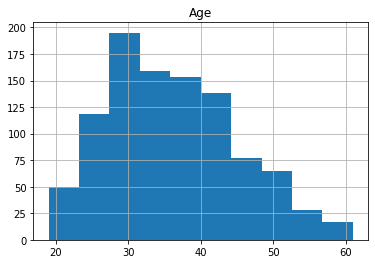

In [11]:
dt.hist(column="Age")

**Crear un jointplot que muestre la relación de la edad vs los ingresos del área** Utilizar la librería seaborn. Interprete la gráfica.

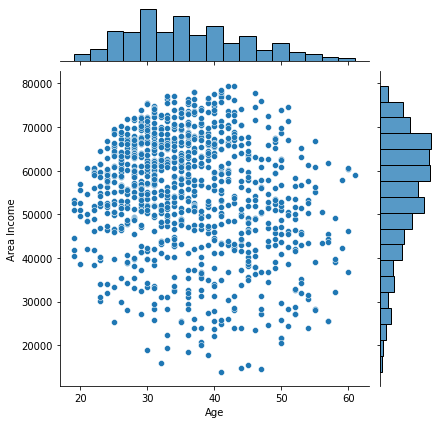

In [14]:
sb.jointplot(data=dt, x="Age",y="Area Income")

**Crear un jointplot que muestre la distribución k de la relación de la edad vs el tiempo que diario empleado**

A la función jointplot agregue los argumentos color='red' y kind='kde'

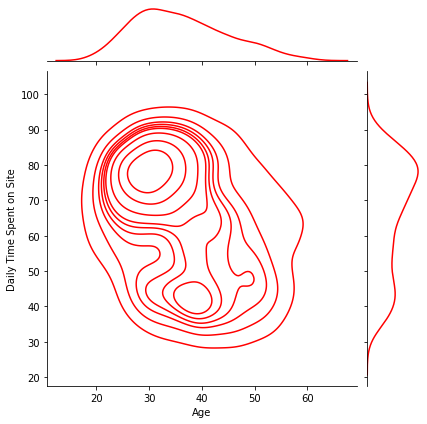

In [15]:
sb.jointplot(data=dt, x="Age",y="Daily Time Spent on Site", color='red', kind='kde')

**Crear un jointplot del Daily Time Spent on Site vs. Daily Internet Usage**

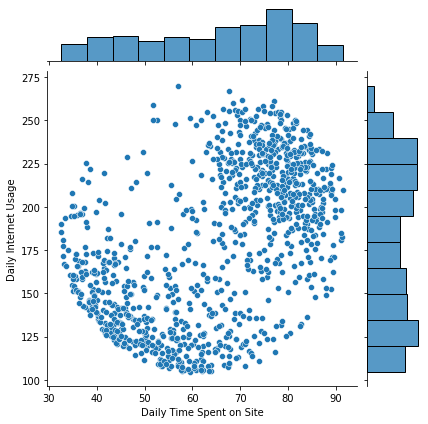

In [16]:
sb.jointplot(data=dt, x="Daily Time Spent on Site", y="Daily Internet Usage")

**Finalmente, crear un pairplot que separe las poblaciones de 'Clicked on Ad'** Utilice el argumento hue y puede colocar un palette='bwr'

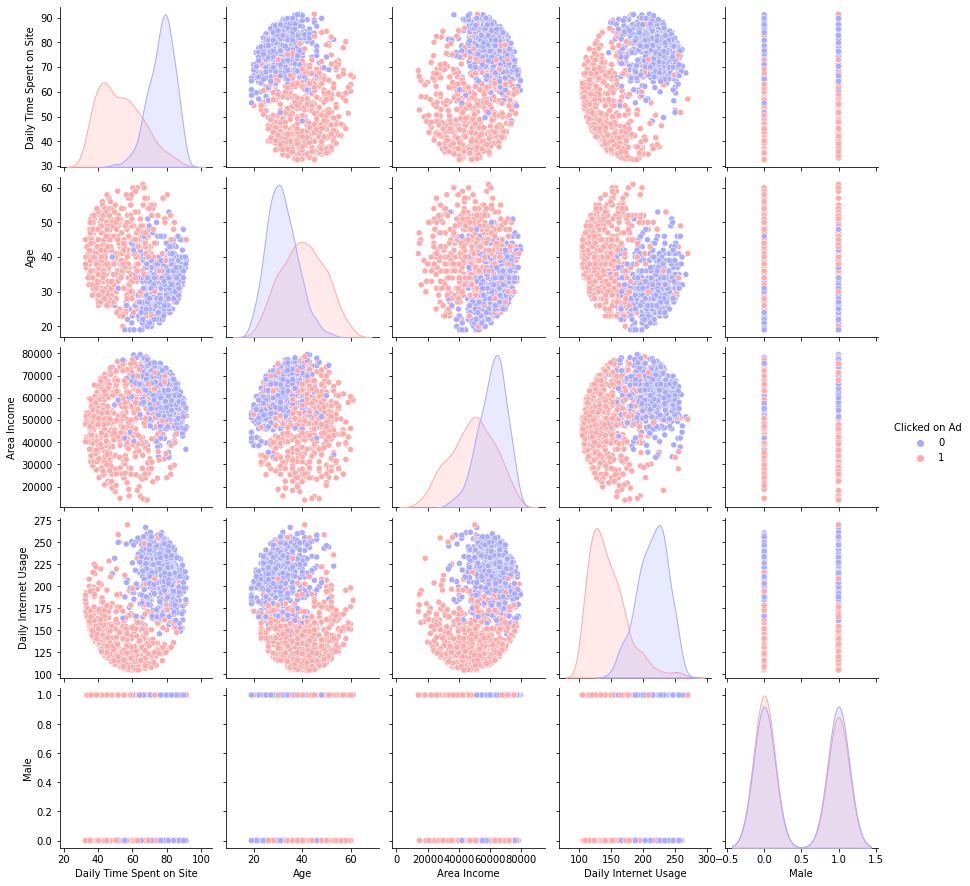

In [17]:
sb.pairplot(dt, hue="Clicked on Ad", palette='bwr')

# Logistic Regression


¡Ahora es el momento de hacer una prueba de train/test splot y entrenar nuestro modelo!

Aquí tendrás la libertad de elegir las columnas en las que quieras entrenar.

In [23]:
from sklearn.model_selection import train_test_split

In [29]:
x = dt[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']]
y = dt['Clicked on Ad']

**Usar train_test_split para generar X_train, X_test, y_train y y_test con un 33% en el split para split**

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33)

**Entrene y ajuste un modelo de regresión logística en el conjunto de entrenamiento.**

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
training_predictions = LogisticRegression().fit(x,y)

## Predictions and Evaluations
**Ahora predecir los valores para los datos de prueba.**

In [33]:
training_predictions.predict(x_test)

array([0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,

**Crear un reporte de classificación (classification_report) para el mdoelo.**

In [41]:
from sklearn.metrics import classification_report

In [44]:
print(classification_report(y_test,training_predictions.predict(x_test)))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90       162
           1       0.94      0.87      0.90       168

    accuracy                           0.90       330
   macro avg       0.90      0.90      0.90       330
weighted avg       0.91      0.90      0.90       330



**Imprima el confussion matrix de la clasificación**

In [45]:
from sklearn.metrics import confusion_matrix

In [46]:
confusion_matrix(y_test,training_predictions.predict(x_test))

array([[152,  10],
       [ 22, 146]], dtype=int64)

## Extra (Random Forest)

Aplique la clasificación utilizando Random Forest y compare los resultados

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
forest = RandomForestClassifier()

In [49]:
forest.fit(x_train, y_train)
predictions = training_predictions.predict(x_test)

In [50]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90       162
           1       0.94      0.87      0.90       168

    accuracy                           0.90       330
   macro avg       0.90      0.90      0.90       330
weighted avg       0.91      0.90      0.90       330

